# Zero-shot text-to-image generation

https://arxiv.org/pdf/2102.12092.pdf  
https://www.youtube.com/watch?v=az-OV47oKvA  


text-to-image generation은 dataset에 대하여 더 좋은 modeling assumption을 찾는 것에 집중됨. 이러한 가정은 복잡한 구조의 모델을 사용하거나 보조 loss 또는 side information(object part labels, segmentation mask)등을 이용함.

저자들은 대용량 모델(transformer)기반의 간단한 approach 제안  


## Introduction

text condition을 이용한 image 생성은 여러 방법들로 연구가 되고 있었음(GAN 등등)  

알고리즘의 문제가 아닌 데이터셋과 모델 용량을 늘려본 것이 아이디어  

기존의 모델들은 MS-COCO(330K), CUB-200(11K)같은 데이터셋으로 학습, 다른 task에 비해 작은 데이터셋임  
저자들은 총 250M 의 text-image pairs를 수집하여 학습시킴  


## Method

방법은 12-billion transformer를 통해 text와 image token을 single stream of data로서 모델링함.  

이때 image token으로 pixel을 직접 사용하면 과한 메모리가 사용됨 > dVAE(VQ-VAE)를 사용!  

두 단계로 나눠서 dVAE와 transformer를 training  


**stage 1**  

256x256 RGB image를 32x32 token으로 압축  
dVAE를 이용하여 8192 codebook 학습    
이때 gumbel-softmax relaxation을 이용  



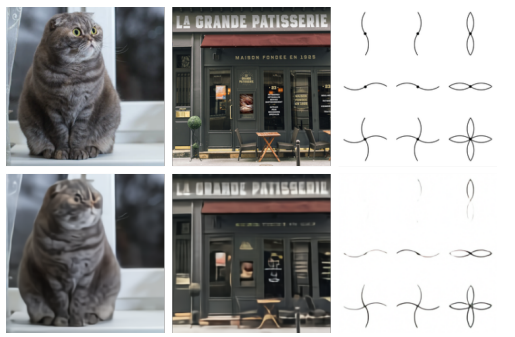

Figure 1.  
original image vs reconstructions  

**stage 2**  

256 BPE encoding된 text와 dVAE를 통한 image tokens을 concat  
transformer를 학습하여 text와 image token에 대한 joint distribution을 모델링

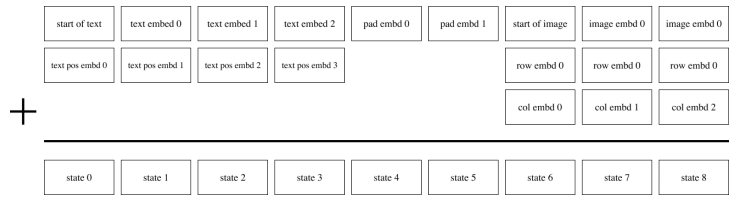

Figure 10.  
transformer의 input  

transformer는 decoder로만 구성되있으며  
64개의 attention layer에 각각 62개의 attention head, per-head state size는 64  
(model size = 62*64 = 3968)


식으로 표현하면,  

아래의 결합분포를 학습하는것과 같다고 볼 수 있음  

$$p_{θ,ψ}(x,y,z) = p_{θ}(x|y,z)p_{ψ}(y,z)$$  

$ x : \mbox{images} $  
$ y : \mbox{captions} $  
$ z : \mbox{encoded RGB image tokens} $  

$ p_θ : \mbox{distribution over the RGB images by dVAE decoder} $  
$ p_ψ : \mbox{distribution over the text and image tokens modeled by transformer} $

## Experiments

MS-COCO에서 AttnGAN, DM-GAN, DF-GAN 과 비교하며 실험 진행  



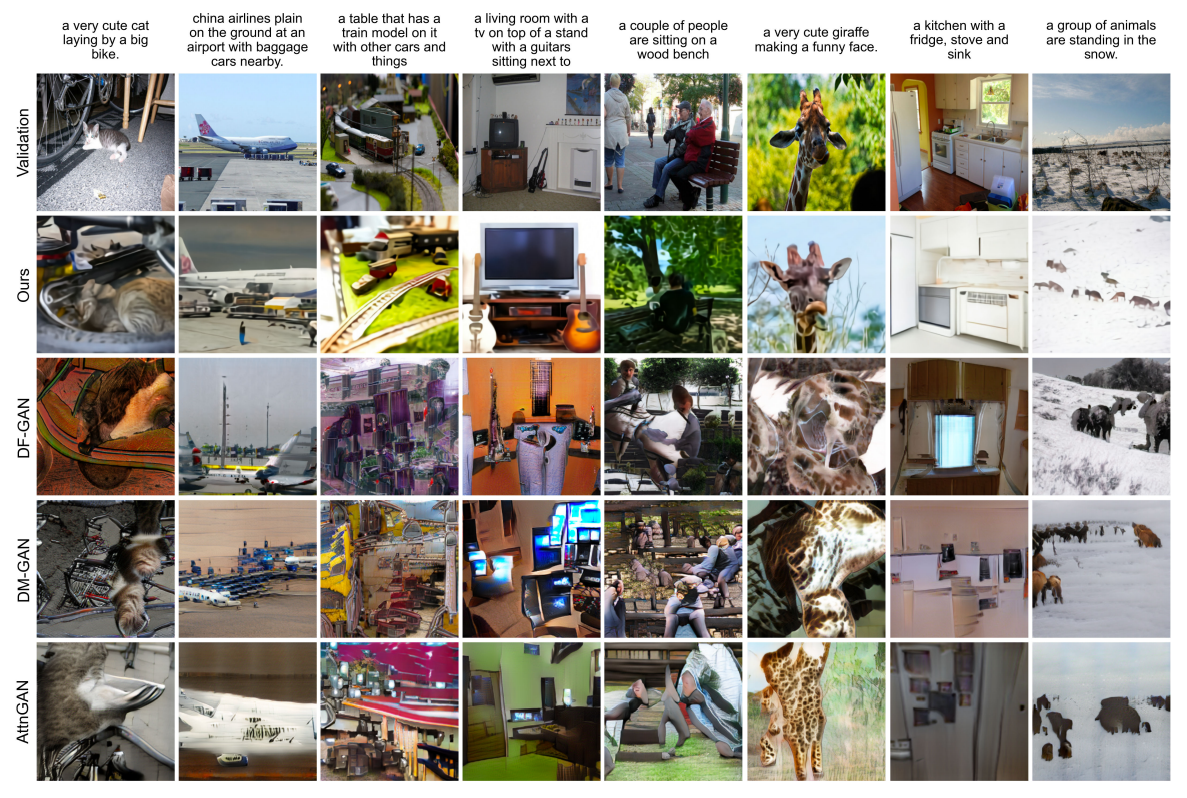

Figure 3.  
Comparison of samples

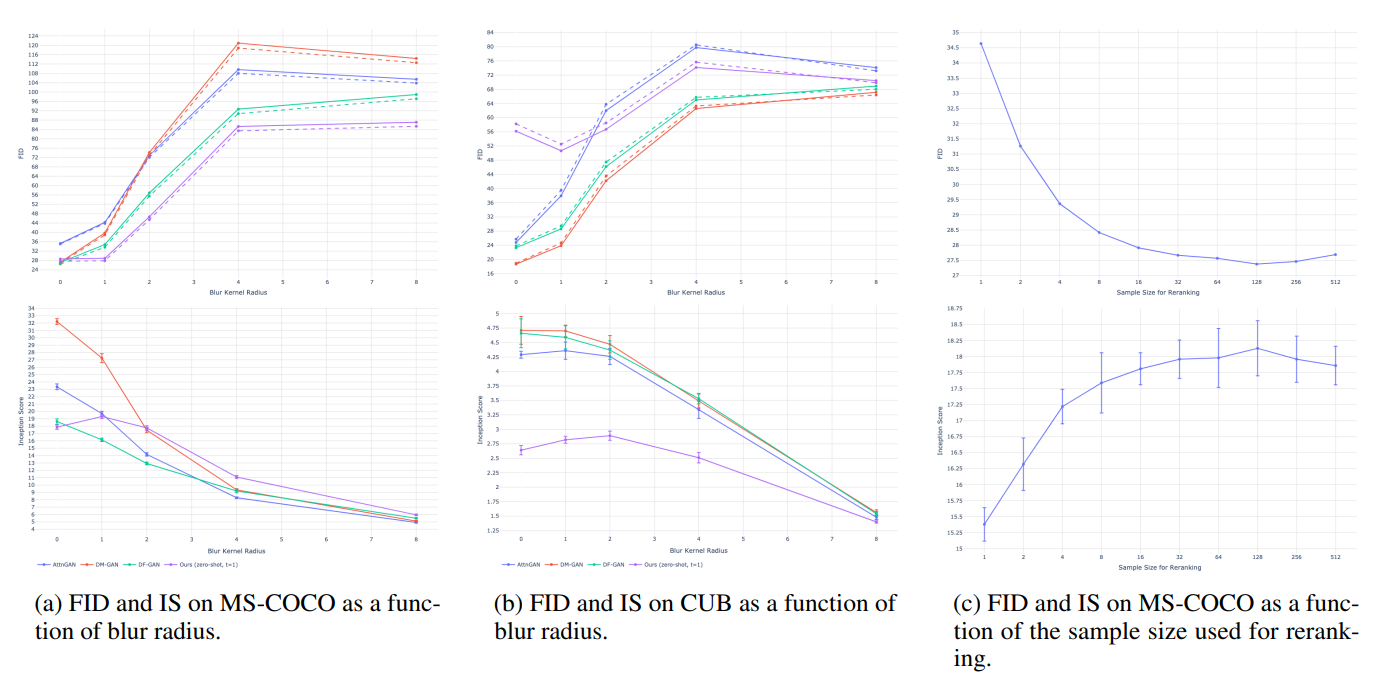

Figure 9.  
보라색이 dalle 모델, MS-COCO에서는 FID가 가장 낮고, IS가 가장 높음  
CUB에서는 반대.. 특이한 데이터 에서는 잘 안되는 모습 > future work로 남김 (dalle2에서 해결?)  


#### Mixed-precision training
#### Distributed optimization